In [112]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [113]:
#prepare the dataset
df = pd.read_csv("shopping_behavior_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
747,748,51,Male,Shorts,Clothing,74,Oklahoma,L,Gold,Spring,4.4,Yes,Next Day Air,Yes,Yes,13,Bank Transfer,Weekly
3827,3828,62,Female,Jewelry,Accessories,73,Montana,M,Red,Summer,4.1,No,Standard,No,No,47,Cash,Fortnightly
477,478,42,Male,Sweater,Clothing,56,North Dakota,M,Green,Summer,3.7,Yes,Free Shipping,Yes,Yes,49,Debit Card,Weekly
1152,1153,62,Male,Handbag,Accessories,49,Connecticut,M,Gold,Fall,4.0,No,Standard,Yes,Yes,8,PayPal,Every 3 Months
3338,3339,29,Female,Skirt,Clothing,94,Minnesota,L,White,Winter,2.9,No,2-Day Shipping,No,No,46,Credit Card,Monthly


In [114]:
#check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [115]:
#check dataset statistic
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [116]:
df.shape

(3900, 18)

In [117]:
# count the missing values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [118]:
# Check for duplicated data
print("There are", df.duplicated().sum(), "duplicated data")

There are 0 duplicated data


In [119]:
#remove irrelevant columns
df = df.drop('Customer ID', axis=1)

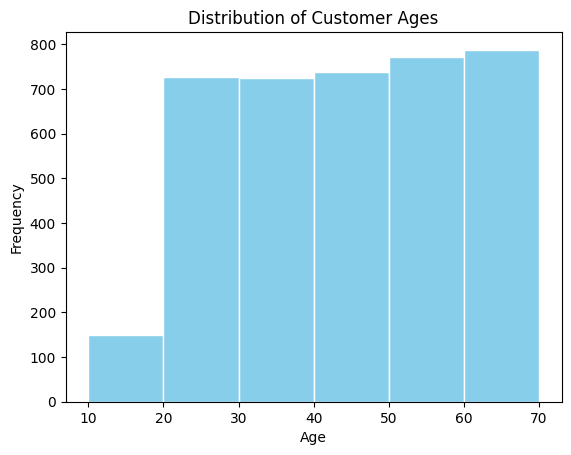

In [120]:
# Histogram of age
plt.figure(dpi=100)
bin_edges = [10, 20, 30, 40, 50, 60, 70]
bar = plt.hist(df['Age'], bins=bin_edges, color='skyblue', edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

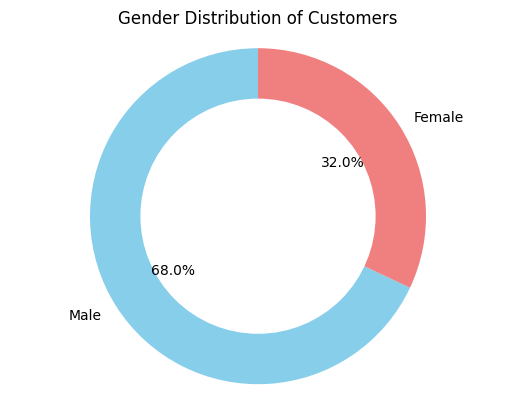

In [121]:
# Visualization of Customer Gender
plt.figure(dpi=100)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Gender Distribution of Customers')
plt.show()

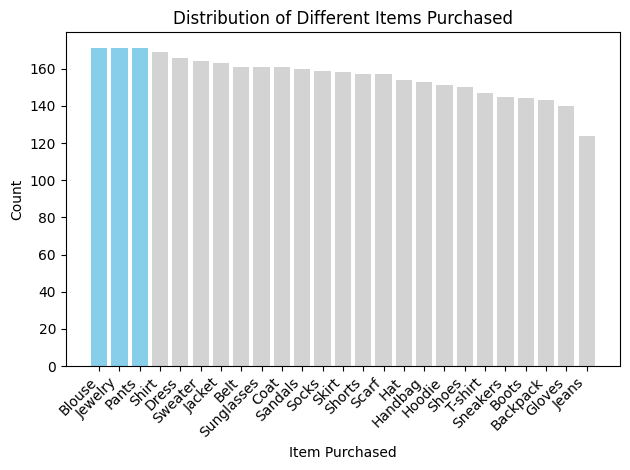

In [122]:
#visualization of item purchased
plt.figure(dpi=100)
item_counts = df['Item Purchased'].value_counts()
colors = ['skyblue' if count == item_counts.max() else 'lightgray' for count in item_counts.values]
plt.bar(item_counts.index, item_counts.values, color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Item Purchased', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Different Items Purchased', fontsize=12)

plt.tight_layout()
plt.show()

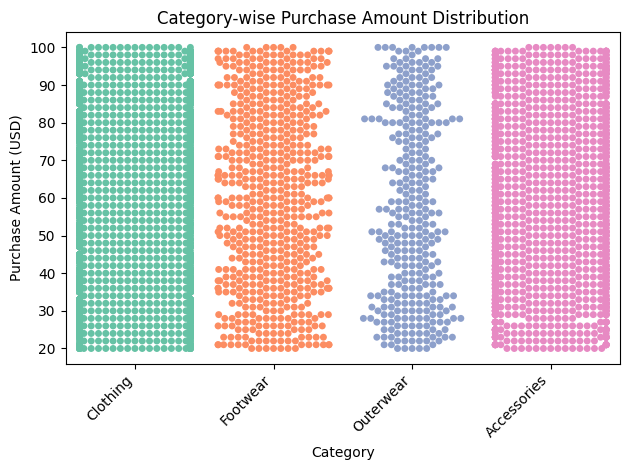

In [123]:
#Visualization of category with Purchase Amount
plt.figure(dpi=100)
sns.swarmplot(x='Category', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.title('Category-wise Purchase Amount Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [124]:
!pip install chart-studio


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import chart_studio
username='kokoh_2307'
api_key='rcHJX4XIoXqZM4uYJHZZ'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [126]:
import chart_studio.plotly as py
import chart_studio.tools as tls

import plotly.express as px

# Extract the 'Location' and 'Purchase Amount (USD)' columns from the DataFrame
df_spatial = df[['Location', 'Purchase Amount (USD)']]

# Group by 'Location' and calculate the average purchase amount for each location
df_spatial = df_spatial.groupby('Location').mean()

# Reset the index and rename the 'Purchase Amount (USD)' column
df_spatial = df_spatial.reset_index().rename(columns={"Purchase Amount (USD)": "Average Purchase Amount (USD)"})

# Mapping state names to their respective two-letter codes
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

# Create a new column 'Code' by mapping the 'Location' column to the state codes
df_spatial['Code'] = df_spatial['Location'].map(code)

# Create a choropleth map using Plotly Express to visualize average purchase amounts by state
fig = px.choropleth(
    df_spatial,
    locations='Code',  # Specify the state codes for locations
    color='Average Purchase Amount (USD)',  # Use average purchase amount for coloring
    color_continuous_scale='Viridis',  # Choose a color scale
    hover_name='Location',  # Display location names on hover
    locationmode='USA-states',  # Set the location mode to 'USA-states'
    labels={'Average Purchase Amount (USD)': 'Average Purchase Amount (USD)'},  # Label for color legend
    scope='usa'  # Set the map scope to 'usa'
)

# Update layout properties such as title and margin
fig.update_layout(
    title={
        'text': 'Average Customer Purchase Amount by State',
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5
    },
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins to move the map closer to the legend
)

# Show the interactive plot with specified height and width
fig.show(height=700, width=1400)

In [127]:
py.plot(fig, filename="plotly_map", auto_open = True)

'https://plotly.com/~kokoh_2307/1/'

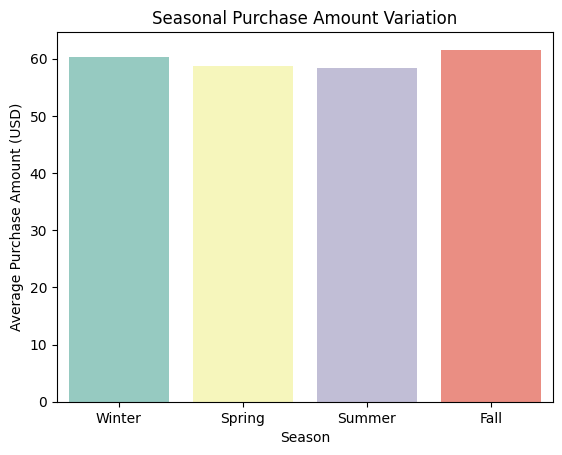

In [128]:
#Visualization of seasonal purchase
plt.figure(dpi=100)
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df, ci=None, palette='Set3')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Seasonal Purchase Amount Variation')
plt.show()

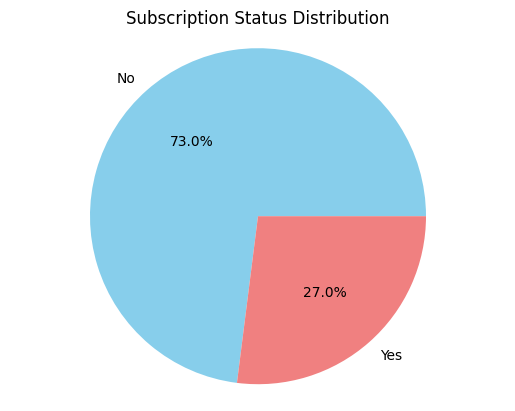

In [129]:
plt.figure(dpi=100)
subscription_counts = df['Subscription Status'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Subscription Status Distribution')
plt.axis('equal')
plt.show()

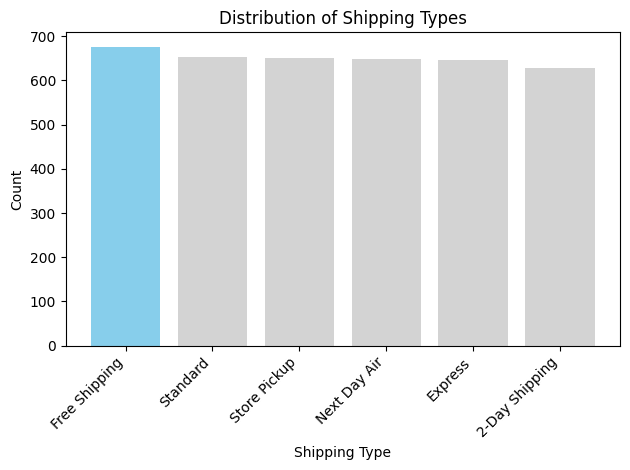

In [130]:
plt.figure(dpi=100)
ship_counts = df['Shipping Type'].value_counts()
colors = ['skyblue' if count == ship_counts.max() else 'lightgray' for count in ship_counts.values]
plt.bar(ship_counts.index, ship_counts.values, color=colors)
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.title('Distribution of Shipping Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

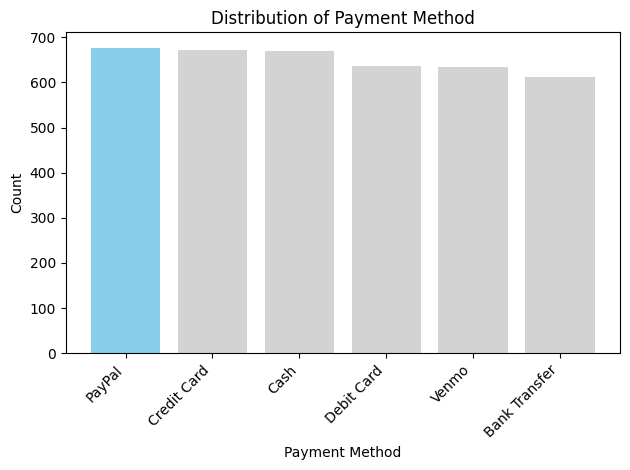

In [131]:
#Visualization of payment method
plt.figure(dpi=100)
pay_counts = df['Payment Method'].value_counts()
colors = ['skyblue' if count == pay_counts.max() else 'lightgray' for count in pay_counts.values]
plt.bar(pay_counts.index, pay_counts.values, color=colors)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

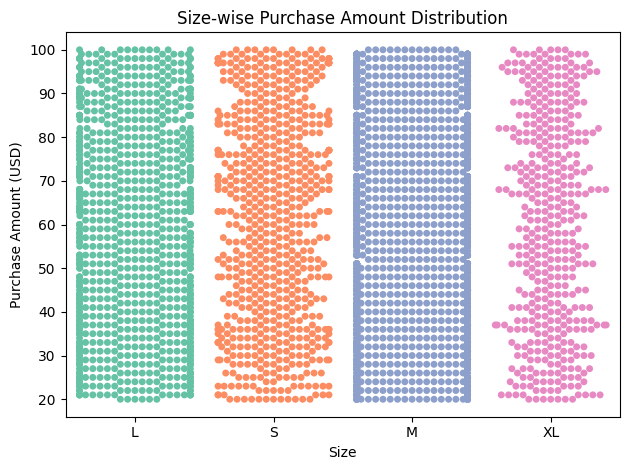

In [132]:
#Visualization of size with purchase amount
plt.figure(dpi=100)
sns.swarmplot(x='Size', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.title('Size-wise Purchase Amount Distribution')
plt.tight_layout()
plt.show()

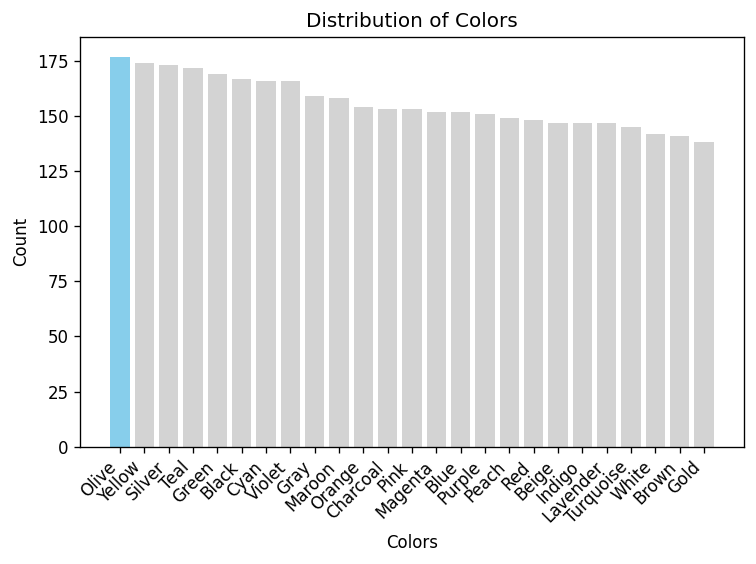

In [133]:
plt.figure(dpi=120)  # Adjust the figure size if needed
color_counts = df['Color'].value_counts()
colors = ['skyblue' if count == color_counts.max() else 'lightgray' for count in color_counts.values]
plt.bar(color_counts.index, color_counts.values, color=colors)
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Distribution of Colors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

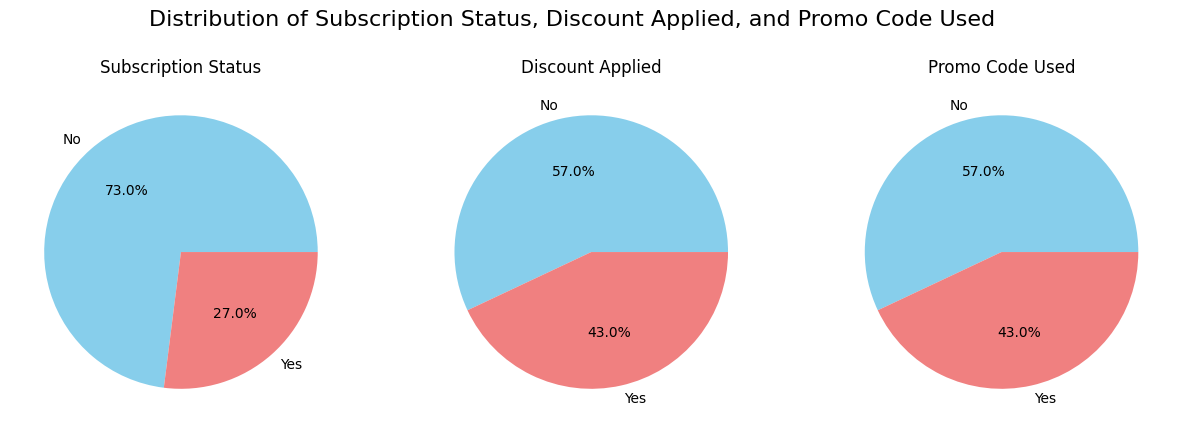

In [134]:
# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Subscription Status, Discount Applied, and Promo Code Used', fontsize=16)

# Plot 1: Subscription Status Distribution
subscription_counts = df['Subscription Status'].value_counts()
axs[0].pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[0].set_title('Subscription Status')

# Plot 2: Discount Applied Distribution
discount_counts = df['Discount Applied'].value_counts()
axs[1].pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[1].set_title('Discount Applied')

# Plot 3: Promo Code Used Distribution
promo_counts = df['Promo Code Used'].value_counts()
axs[2].pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[2].set_title('Promo Code Used')

# Adjust layout
plt.show()

In [135]:
# Define a function to calculate annual purchase based on frequency
def calculate_annual_purchase(row):
    if row['Frequency of Purchases'] == 'Annually':
        return row['Purchase Amount (USD)'] * 1
    elif row['Frequency of Purchases'] in ['Every 3 Months', 'Quarterly']:
        return row['Purchase Amount (USD)'] * 4
    elif row['Frequency of Purchases'] == 'Monthly':
        return row['Purchase Amount (USD)'] * 12
    elif row['Frequency of Purchases'] in ['Bi-Weekly', 'Fortnightly']:
        return row['Purchase Amount (USD)'] * 26
    elif row['Frequency of Purchases'] == 'Weekly':
        return row['Purchase Amount (USD)'] * 52
    else:
        return row['Purchase Amount (USD)']

# Apply the function to create the 'Annual Purchase' column
df['Annual Purchases (USD)'] = df.apply(calculate_annual_purchase, axis=1)
df.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Annual Purchases (USD)
3152,49,Female,Belt,Accessories,90,North Carolina,M,Red,Fall,3.1,No,Store Pickup,No,No,17,PayPal,Monthly,1080
3047,21,Female,Sneakers,Footwear,74,Vermont,M,Violet,Fall,4.1,No,2-Day Shipping,No,No,3,PayPal,Bi-Weekly,1924
1617,43,Male,Blouse,Clothing,64,Wisconsin,M,Peach,Winter,4.3,No,Standard,Yes,Yes,50,Credit Card,Fortnightly,1664
1472,39,Male,Hat,Accessories,24,Indiana,L,Turquoise,Spring,3.5,No,Store Pickup,Yes,Yes,11,Cash,Weekly,1248
3123,57,Female,Handbag,Accessories,77,Iowa,XL,Red,Fall,3.3,No,Next Day Air,No,No,40,Venmo,Bi-Weekly,2002


In [136]:
# Select relevant columns for segmentation
df_col = df[["Age", "Annual Purchases (USD)"]]
df_col.sample(5)

,Age,Annual Purchases (USD)
2594,59,324
65,65,144
2927,45,624
3375,51,98
2396,38,4264


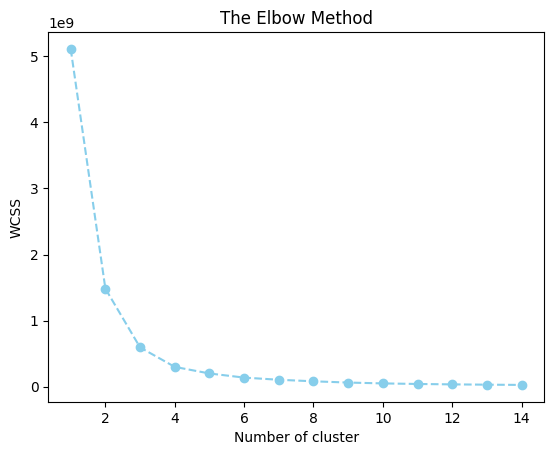

In [137]:
#Menentukan nilai K (jumlah cluster)
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_col)
  wcss.append(kmeans.inertia_)
  
#Plot grafik nilai WCSS
plt.figure(dpi=100)
plt.plot(range(1,15), wcss, marker = 'o', linestyle = '--', color='skyblue')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [138]:
#Using clustering = 3
kmeans= KMeans(n_clusters= 3, init = 'k-means++', random_state = 42)
kmeans.fit(df_col)

KMeans(n_clusters=3, random_state=42)

Text(0, 0.5, 'Frequency')

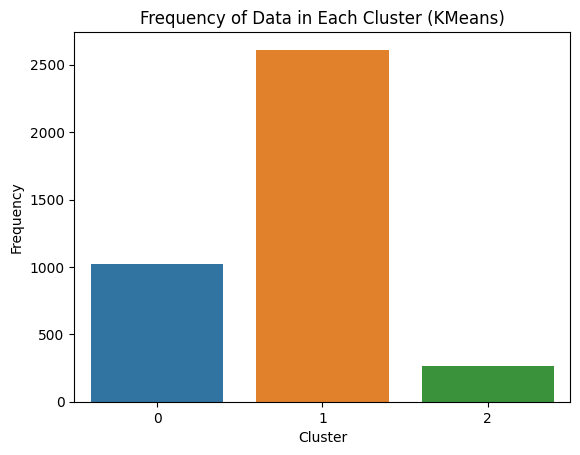

In [139]:
kmeans_results = df_col.copy()
kmeans_results["cluster"] = kmeans.labels_

# Visualization of cluster
cluster_x = kmeans_results["cluster"].value_counts().index
cluster_y = kmeans_results["cluster"].value_counts().values

sns.barplot(x=cluster_x, y=cluster_y, data=df_col)
plt.title("Frequency of Data in Each Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frequency")

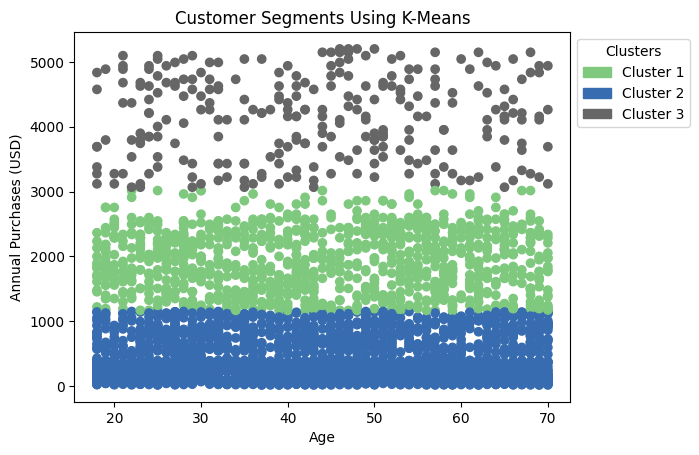

In [148]:
#Visualization of customer segments
import matplotlib.patches as mpatches
plt.figure(dpi=100)
scatter = plt.scatter(
    df_col['Age'],
    df_col['Annual Purchases (USD)'],
    c=kmeans.labels_,
    cmap='Accent'
)

# Create legend handles
cluster_mapping = {0: 1, 1: 2, 2: 3}
classes = sorted(np.unique(kmeans.labels_))
class_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(cls)), label=f'Cluster {cluster_mapping[cls]}') for cls in classes]

plt.title('Customer Segments Using K-Means')
plt.xlabel('Age')
plt.ylabel('Annual Purchases (USD)')
plt.legend(handles=class_handles, title='Clusters', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()